# Diamond Price Prediction
### Introduction About the Data : The dataset The goal is to predict price of given diamond (Regression Analysis).

#### There are 10 independent variables (including id):

- id : unique identifier of each diamond
- carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
- cut : Quality of Diamond Cut
- color : Color of Diamond
- clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
- depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
- table : A diamond's table is the facet which can be seen when the stone is viewed face up.
- x : Diamond X dimension
- y : Diamond Y dimension
- x : Diamond Z dimension
#### Target variable:
- price: Price of the given Diamond.

Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/gemstone.csv')

In [3]:
data.head(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
5,5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
6,6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
7,7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421


In [4]:
data.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


#### Remove the Id from the data

In [7]:
data.drop(columns='id',axis=1,inplace=True)

#### Find the categorical and Numerical columns

In [8]:
categorical_columns = [ col for col in data.columns if data[col].dtypes == 'object']
numerical_columns = [ col for col in data.columns if data[col].dtypes != 'object']
print(categorical_columns,numerical_columns)

['cut', 'color', 'clarity'] ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']


#### Describe data for Categorical Columns

In [9]:
data[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [10]:
data['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

- Cut, Clarity, Color Ordinal features. They have to be ranked

In [11]:
data['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [12]:
data['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

## DATA ANALYSIS

#### Histogram Plot For Numerical columns

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

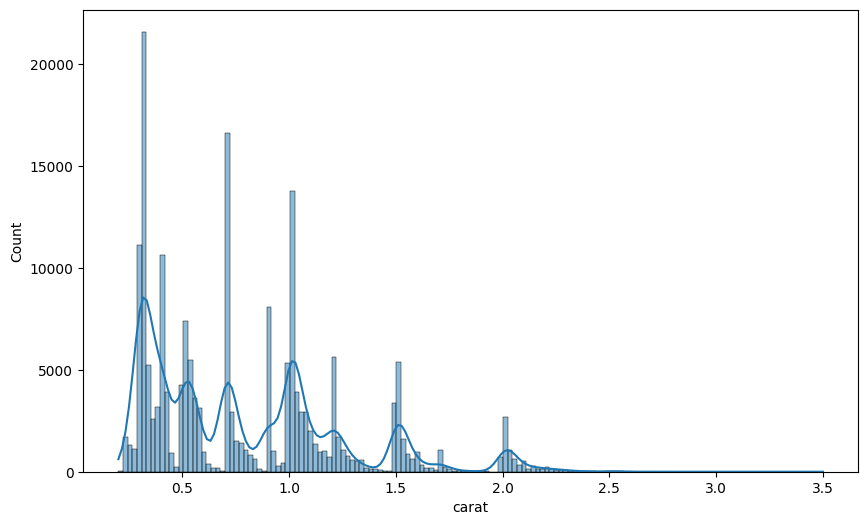

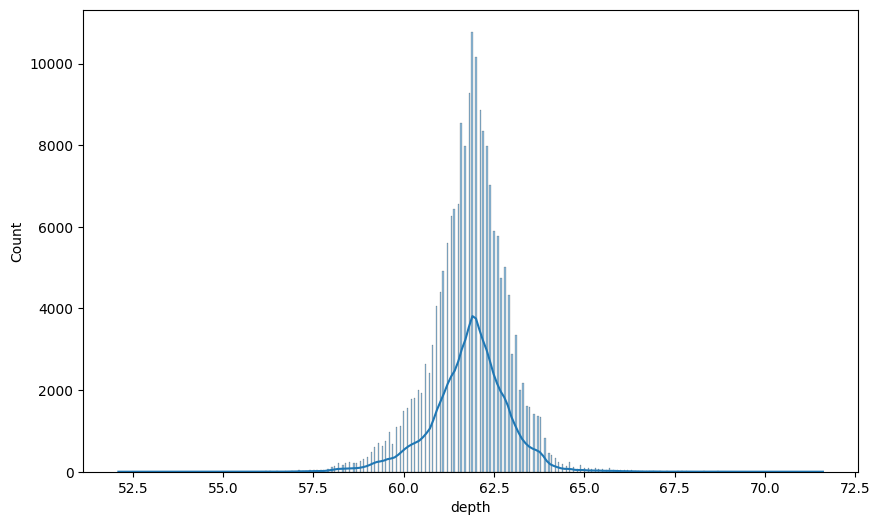

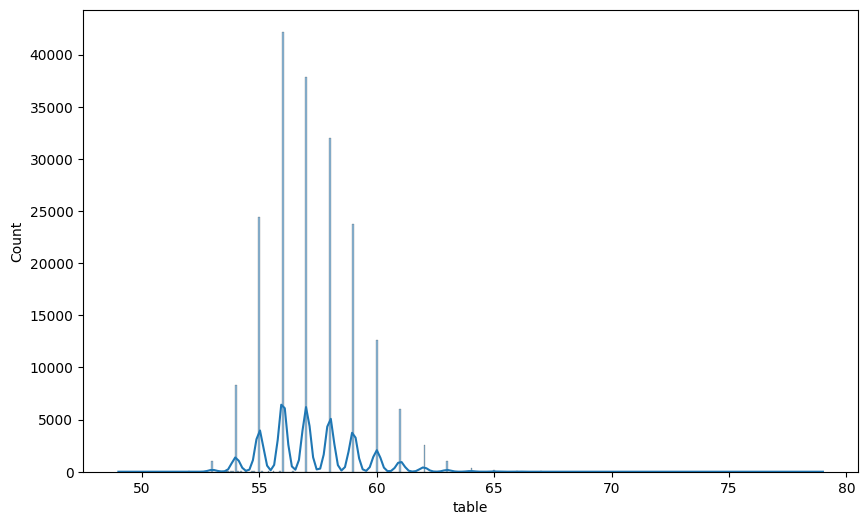

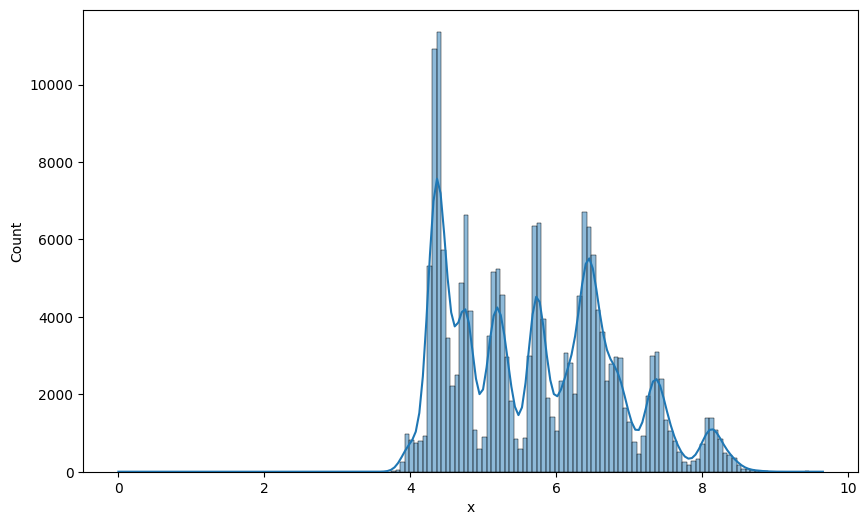

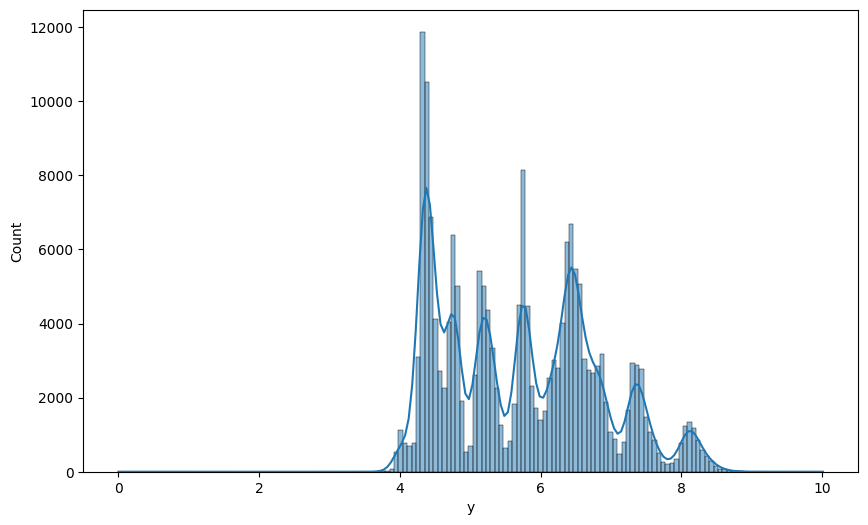

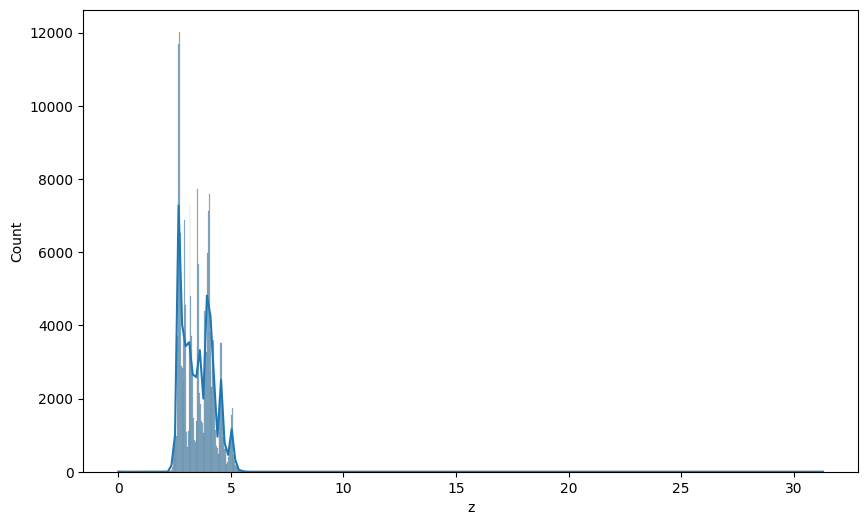

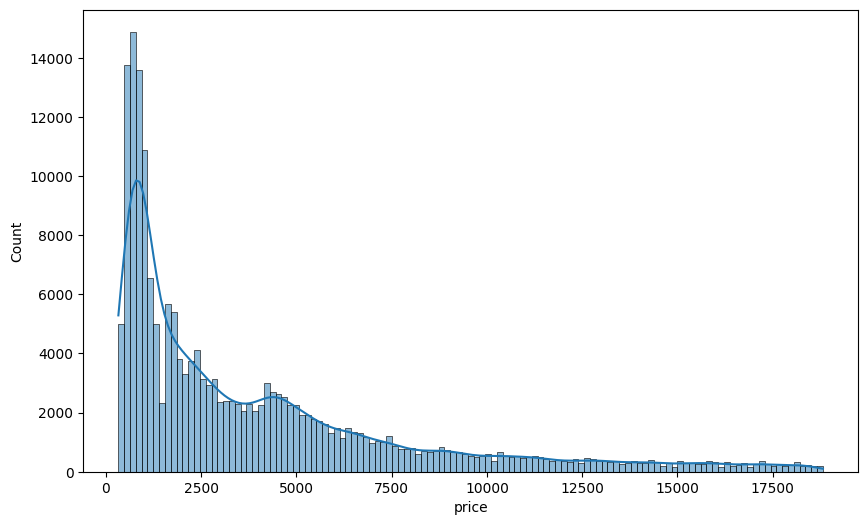

In [14]:
for col in numerical_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data=data, x=col,kde=True)
    plt.show()

<Figure size 1000x600 with 0 Axes>

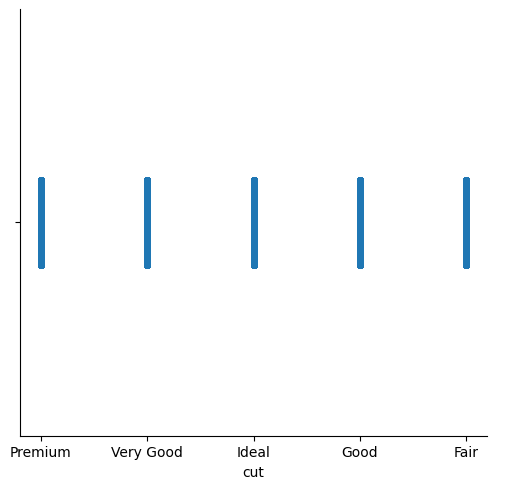

<Figure size 1000x600 with 0 Axes>

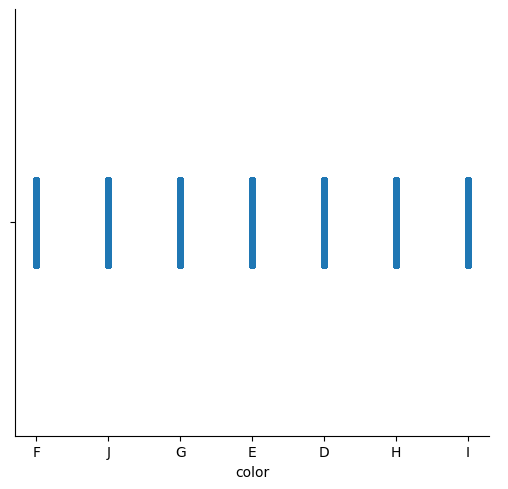

<Figure size 1000x600 with 0 Axes>

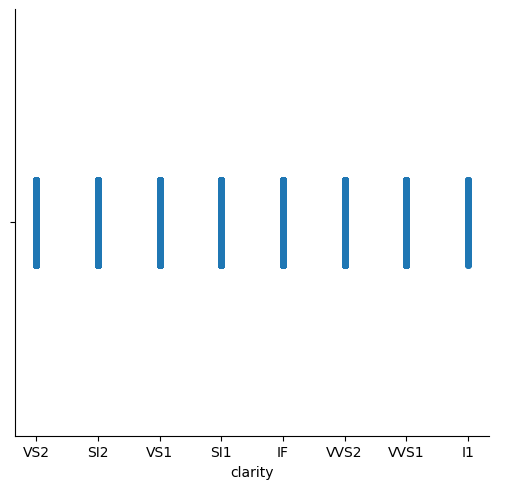

In [15]:
for col in categorical_columns:
    plt.figure(figsize=(10,6))
    sns.catplot(data=data, x=col)
    plt.show()

#### Correlation of Numerical columns

<Axes: >

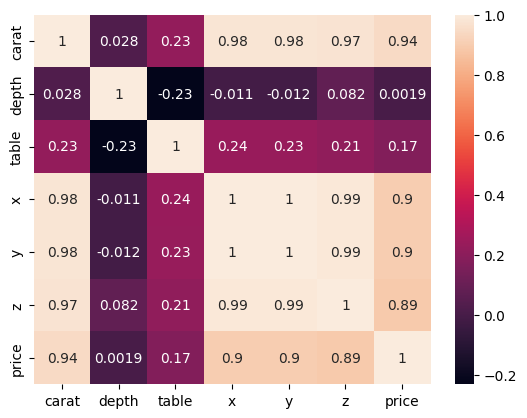

In [16]:
sns.heatmap(data[numerical_columns].corr(), linecolor='black',annot=True)

- Carat,x,y and z are highly correlated. So it is possible that it is required to use only one feature among them feature selection.

In [17]:
data['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

#### Encoding for Ordinal Categories
- For Cut, highest rank is given to Premium
- For clarity, highest rank is given to VVS2

In [18]:
cut_map = {
    'Premium':5,
    'Very Good':4,
    'Ideal':3,
    'Good':2,
    'Fair':1
}

In [19]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}
map_dict = {
    'cut': cut_map,
    'clarity': clarity_map,
    'color': color_map
}

In [22]:
for col in ['cut','clarity','color']:
     data[col] = data[col].map(map_dict[col])

0         5
1         4
2         3
3         3
4         5
         ..
193568    3
193569    5
193570    4
193571    4
193572    2
Name: cut, Length: 193573, dtype: int64